In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
from torch.nn import functional as F
from torch.autograd import Variable
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns
import numpy as np
import pandas as pd
import h5py
import cv2
from scipy.stats import pearsonr#Pearson correlation coefficient
from scipy.stats import spearmanr#spearmanr correlation coefficient
import datetime
import time
import itertools
import pickle
from copy import deepcopy
import sys
#import winsound#sound alarm when code finishes, only in windows
#import pytorch_ssim

# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

# for plot figures
#Output matplotlib figure to SVG with text as text, not curves
plt.rcParams['svg.fonttype'] = 'none'

/usr/local/lib/python3.9/dist-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [2]:
torch.backends.cudnn.benchmark = False
torch.cuda.manual_seed(1)

torch.backends.cudnn.deterministic=True
np.random.seed(1)
torch.manual_seed(1)    # reproducible

# Load data
We use the first 4000 images in `training_inputs` for training.

In [3]:
#load data
with open('Data_Franke_et_al_2021/static25311-10-26.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)
print (loaded_dict.keys())

dict_keys(['training_inputs', 'training_responses', 'test_inputs', 'test_responses_repeats'])


training inputs shape: (4409, 2, 36, 64)
Max: 255.0


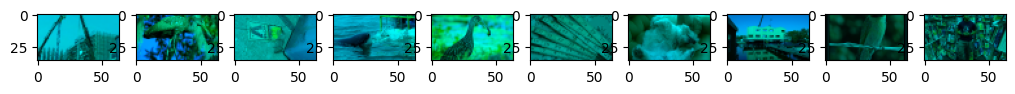

In [4]:
#training data, shape (4409, 2, 36, 64), number of stimuli: 4409, stimuli size: (2, 36, 64)
#the maximum is 255
training_inputs = loaded_dict['training_inputs'] 
#Rescaling，make the data range 0-1.0
#training_inputs=training_inputs/255.0
print ('training inputs shape: {}'.format(training_inputs.shape))
print ('Max: {}'.format(np.max(training_inputs)))
fig, axes = plt.subplots(nrows=1, ncols=10,figsize=(12.5,2.5))
for ii in range(10):
    temp = training_inputs[ii]
    temp2 = np.zeros((temp.shape[1],temp.shape[2],3), dtype=np.uint8)
    temp2[:,:,1:] = np.transpose(temp,(1,2,0))[:,:,:]
    axes[ii].imshow(temp2)

In [5]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device_cpu=torch.device('cpu')

# Analysis of query images

## 1st neuron

In [6]:
# two seeds
neuron_ind = 123
tempmodels=['VariationalCNN']
query_method = 'maxoutputstd'
dataname='Franke2021'

first_seed = 2
lucky_index_array = np.load(\
    f'./out_result/imgind_Neuron_{neuron_ind}_{tempmodels[0]}_Data_{dataname}_Query_{query_method}_Seed_{first_seed}.npy')
print (lucky_index_array.shape)
print (f'Were all indices used? {(np.sort(lucky_index_array.flatten())==np.arange(lucky_index_array.size)).all()}')
# shape: (batch_number, batch_size), 1st batch: lucky_index_array[0,:], 2nd batch: lucky_index_array[1,:]
print (lucky_index_array) 

first_seed = 3
lucky_index_array = np.load(\
    f'./out_result/imgind_Neuron_{neuron_ind}_{tempmodels[0]}_Data_{dataname}_Query_{query_method}_Seed_{first_seed}.npy')
print (lucky_index_array.shape)
print (f'Were all indices used? {(np.sort(lucky_index_array.flatten())==np.arange(lucky_index_array.size)).all()}')
print (lucky_index_array)

(20, 200)
Were all indices used? True
[[3562 2127  500 ... 3344 3538 1711]
 [2133 2691 1478 ...  816 3958  577]
 [ 975  832 2933 ... 3452 2983 3265]
 ...
 [3221 1742 3349 ... 3918 3292 2988]
 [3926 1896  241 ... 1569    4 1453]
 [2751 1734 1385 ... 2196 2111 1714]]
(20, 200)
Were all indices used? True
[[1727 2191 1830 ... 2317 2442  883]
 [3408 3828  373 ...  497 1929 2068]
 [ 338 3748 3019 ... 3145  237 1714]
 ...
 [3767  310 2053 ... 2589  155  748]
 [1583 3503 3040 ... 2862 3335 1308]
 [ 940  550 2865 ... 1264 3239 2121]]


In [ ]:
# another two query methods
neuron_ind = 123
tempmodels=['VariationalCNN']
query_method = 'random'
dataname='Franke2021'
first_seed = 2
lucky_index_array = np.load(\
    f'./out_result/imgind_Neuron_{neuron_ind}_{tempmodels[0]}_Data_{dataname}_Query_{query_method}_Seed_{first_seed}.npy')
print (lucky_index_array.shape)
print (f'Were all indices used? {(np.sort(lucky_index_array.flatten())==np.arange(lucky_index_array.size)).all()}')
print (lucky_index_array)

neuron_ind = 123
tempmodels=['VariationalCNN']
query_method = 'maxfc1grad'
dataname='Franke2021'
first_seed = 2
lucky_index_array = np.load(\
    f'./out_result/imgind_Neuron_{neuron_ind}_{tempmodels[0]}_Data_{dataname}_Query_{query_method}_Seed_{first_seed}.npy')
print (lucky_index_array.shape)
print (f'Were all indices used? {(np.sort(lucky_index_array.flatten())==np.arange(lucky_index_array.size)).all()}')
print (lucky_index_array)

## 2nd neuron

In [ ]:
# 
neuron_ind = 77
tempmodels=['VariationalCNN']
query_method = 'maxoutputstd'
dataname='Franke2021'
first_seed = 2
lucky_index_array = np.load(\
    f'./out_result/imgind_Neuron_{neuron_ind}_{tempmodels[0]}_Data_{dataname}_Query_{query_method}_Seed_{first_seed}.npy')
print (lucky_index_array.shape)
print (f'Were all indices used? {(np.sort(lucky_index_array.flatten())==np.arange(lucky_index_array.size)).all()}')
print (lucky_index_array)

## Two neurons

In [ ]:
# different number of neurons
neuron_ind = 2 # file name for ipynb NeuronBatch, when we test multiple neurons
tempmodels=['VariationalCNN']
query_method = 'maxoutputstd'
dataname='Franke2021'
first_seed = 2
lucky_index_array = np.load(\
    f'./out_result/imgind_NeuronBatch_{neuron_ind}_{tempmodels[0]}_Data_{dataname}_Query_{query_method}_Seed_{first_seed}.npy')
print (lucky_index_array.shape)
print (f'Were all indices used? {(np.sort(lucky_index_array.flatten())==np.arange(lucky_index_array.size)).all()}')
print (lucky_index_array)

# Feature extraction

In [7]:
from nnsysident.training.trainers import standard_trainer
from nnsysident.models.models import stacked2d_gamma, stacked2d_zig
from nnsysident.datasets.mouse_loaders import static_loaders
from nnsysident.utility.data_helpers import extract_data_key
from nnsysident.utility.measures import get_model_performance

random_seed = 27121992

Connecting konstantin@134.76.19.44:3306


## Data

In [8]:
# paths = ['./data/static25331-10-26-preproc0']

paths = ['./data/static25311-10-26-ColorImageNet-104e446ed0128d89c639eef0abe4655b']

data_key = extract_data_key(paths[0])

dataset_config = {'paths': paths,
                  'batch_size': 64,
                  'seed': random_seed,
                  'loader_outputs': ["images", "responses"],
                  'normalize': True,
                  'exclude': ["images"],
                  "cuda": True
                  }

dataloaders = static_loaders(**dataset_config)

## Model

In [12]:
model_config_base = {'init_sigma': 0.4,
                     'init_mu_range': 0.55,
                     'gamma_input': 1.0,
                     'grid_mean_predictor': {'type': 'cortex',
                      'input_dimensions': 2,
                      'hidden_layers': 0,
                      'hidden_features': 0,
                      'final_tanh': False},
                     'readout_type': 'MultipleGeneralizedFullGaussian2d',
                     'feature_reg_weight': 0.26702978129164495,
                     'hidden_channels': 128,
                     'layers': 5,
                     'hidden_kern': 11,
                     'input_kern': 15}



gamma_model_config = model_config_base.copy()
gamma_model = stacked2d_gamma(dataloaders, 
                            random_seed, 
                            **gamma_model_config)
gamma_model.to(device);

/usr/local/lib/python3.9/dist-packages/neuralpredictors/layers/cores/conv2d.py:161: UserWarning: The averaged value of regularizer will be used.
  warnings.warn("The averaged value of regularizer will be used.", UserWarning)


## Training

In [13]:
trainer_config_base = {"track_training": False,
                       "device": device,
                       "detach_core": False,
                       "stop_function": "get_correlations",
                       "maximize": True}

In [14]:
gamma_score, gamma_output, gamma_state_dict = standard_trainer(gamma_model,
                                                                     dataloaders,
                                                                     random_seed,
                                                                     loss_function=gamma_model.loss_fn,
                                                                     **trainer_config_base)
# torch.save(gamma_state_dict, "mouseV1_gaussian_Gamma_statedict" + data_key + ".pt")

Epoch 1: 100% 83/83 [00:04<00:00, 17.35it/s]
Epoch 2: 100% 83/83 [00:04<00:00, 19.60it/s]
Epoch 3: 100% 83/83 [00:04<00:00, 19.52it/s]
Epoch 4: 100% 83/83 [00:04<00:00, 19.44it/s]
Epoch 5: 100% 83/83 [00:04<00:00, 19.41it/s]
Epoch 6: 100% 83/83 [00:04<00:00, 19.25it/s]
Epoch 7: 100% 83/83 [00:04<00:00, 19.48it/s]
Epoch 8: 100% 83/83 [00:04<00:00, 19.50it/s]
Epoch 9: 100% 83/83 [00:04<00:00, 19.53it/s]
Epoch 10: 100% 83/83 [00:04<00:00, 19.54it/s]
Epoch 11: 100% 83/83 [00:04<00:00, 19.47it/s]
Epoch 12: 100% 83/83 [00:04<00:00, 19.55it/s]
Epoch 13: 100% 83/83 [00:04<00:00, 19.55it/s]
Epoch 14: 100% 83/83 [00:04<00:00, 19.71it/s]
Epoch 15: 100% 83/83 [00:04<00:00, 19.70it/s]
Epoch 16: 100% 83/83 [00:04<00:00, 19.62it/s]
Epoch 17: 100% 83/83 [00:04<00:00, 19.59it/s]
Epoch 18: 100% 83/83 [00:04<00:00, 19.52it/s]
Epoch 19: 100% 83/83 [00:04<00:00, 19.57it/s]
Epoch 20: 100% 83/83 [00:04<00:00, 19.50it/s]
Epoch 21: 100% 83/83 [00:04<00:00, 19.50it/s]
Epoch 22: 100% 83/83 [00:04<00:00, 19.45it/

Epoch 00043: reducing learning rate of group 0 to 1.5000e-03.


Epoch 44: 100% 83/83 [00:04<00:00, 19.18it/s]
Epoch 45: 100% 83/83 [00:04<00:00, 19.33it/s]
Epoch 46: 100% 83/83 [00:04<00:00, 19.58it/s]
Epoch 47: 100% 83/83 [00:04<00:00, 19.37it/s]
Epoch 48: 100% 83/83 [00:04<00:00, 19.32it/s]
Epoch 49: 100% 83/83 [00:04<00:00, 19.42it/s]


Epoch 00049: reducing learning rate of group 0 to 4.5000e-04.


Epoch 50: 100% 83/83 [00:04<00:00, 19.44it/s]
Epoch 51: 100% 83/83 [00:04<00:00, 19.28it/s]
Epoch 52: 100% 83/83 [00:04<00:00, 19.20it/s]
/usr/local/lib/python3.9/dist-packages/neuralpredictors/measures/modules.py:168: UserWarning: Gammaloss is averaged per batch. It's recommended to use `sum` instead
  warnings.warn("Gammaloss is averaged per batch. It's recommended to use `sum` instead")


In [95]:
model = gamma_model
# model = gamma_model.core

# model = torchvision.models.resnet101(pretrained=True)
# model = torch.nn.Sequential(*(list(model.children())[:-1])).to(device)

### Data

In [83]:
n_input_channels

2

In [90]:
greyscale = True

n_input_channels = 2

all_features, all_labels = [], []
for step, img_idx in enumerate(lucky_index_array):
    images = torch.from_numpy(training_inputs[img_idx]).to(device)
    if greyscale:
        images = torch.mean(images, axis=1, keepdim=True).repeat(1,n_input_channels,1,1)
    else:
        images = images.repeat(1,2,1,1)[:, :n_input_channels, :, :]
    labels = np.ones(lucky_index_array.shape[1]) * step
    if not hasattr(model, "predict_mean"):
        features = model.forward(images).cpu().data.numpy().squeeze()
    else:
        features = model.predict_mean(images).cpu().data.numpy().squeeze()
    if len(features.shape) == 4:
        use_yongrong_neurons = False
        features = features.reshape((features.shape[0], -1))
    all_features.append(features)
    all_labels.append(labels)
all_features = np.stack(all_features).reshape((-1, all_features[0].shape[-1]))
all_labels = np.stack(all_labels).reshape(-1)

# Only use the neurons that are used by Yongrong
if use_yongrong_neurons:
    all_features = all_features[:, neuron_indices]

In [ ]:
from sklearn.manifold import TSNE

coordinates = TSNE(n_components=2).fit_transform(all_features)
coordinates = (coordinates - np.min(coordinates)) / (np.max(coordinates) - np.min(coordinates)) # normalize to range [0, 1]

In [69]:
data = pd.DataFrame({"x": coordinates[:, 0], "y": coordinates[:, 1], "step": all_labels.astype(int)})

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)

sns.scatterplot(x="x", y="y", hue="step", data=data, ax=ax, palette=sns.color_palette("rocket", n_colors=len(data["step"].unique())))
plt.legend(bbox_to_anchor=(1.02, .8))
sns.despine(ax=ax)

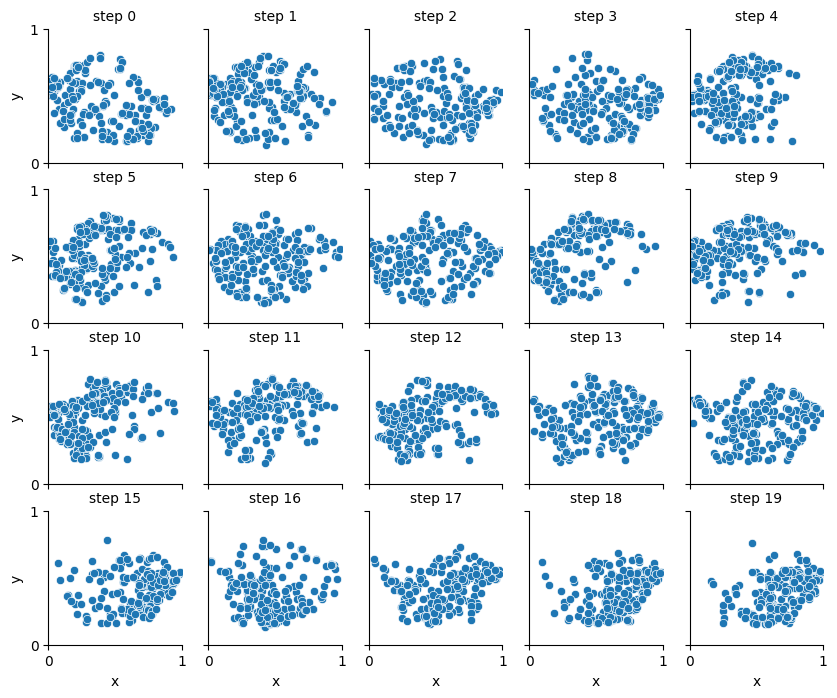

In [59]:
fig, axes = plt.subplots(4, 5, figsize=(10, 8), dpi=100, sharex=True, sharey=True)
fontsize = 10

steps = data["step"].unique()
for step, ax in zip(steps, axes.flatten()):
    dat = data.loc[data["step"] == step]
    sns.scatterplot(x="x", y="y", data=dat, ax=ax)
    ax.set(xlim=[0, 1], ylim=[0,1], yticks=[0,1], xticks=[0,1])
    ax.set_title(f"step {step}", fontsize=fontsize)
sns.despine()
# fig.savefig("T-SNE neural embedding" + ".png", bbox_inches="tight", transparent=False)